In [48]:
# Import the random module.
import random
# Import the NumPy module.
import numpy as np
# Import timeit.
import timeit
import matplotlib.pyplot as plt
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
import requests
import json
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
import pandas as pd
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

random_number = random.randint(-90, 90) + random.random()
#random_number

In [49]:
x = 1
latitudes = []
while x < 11:
    random_lat = random.randint(-90, 89) + random.random()
    latitudes.append(random_lat)
    x += 1

In [50]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

12.1 µs ± 265 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [51]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.
%timeit latitudes(1500)

1.23 ms ± 28.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [52]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [53]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [54]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [55]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [56]:
#pip install citipy

In [57]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

airai pw
ahipara nz
cape town za
breves br
tuktoyaktuk ca
chabahar ir
ahipara nz
zhangjiakou cn
bluff nz
rikitea pf
rikitea pf
punta arenas cl
borazjan ir
new norfolk au
sabang id
ushuaia ar
port alfred za
arraial do cabo br
gwembe zm
ballina au
hermanus za
saint george bm
dikson ru
ushuaia ar
machali cl
bellingham us
taolanaro mg
lagoa pt
barrow us
evensk ru
nikolskoye ru
caravelas br
cape town za
husavik is
summerland ca
gold coast au
belushya guba ru
jerantut my
tumannyy ru
alofi nu
leningradskiy ru
vila velha br
klaksvik fo
amderma ru
punta arenas cl
garowe so
prince rupert ca
hihifo to
muriwai beach nz
talnakh ru
mahebourg mu
japura br
miacatlan mx
saint leonard ca
punta arenas cl
mount isa au
hamilton bm
mataura pf
albany au
hermanus za
port-cartier ca
batagay-alyta ru
norman wells ca
guhagar in
mar del plata ar
mmathubudukwane bw
iquitos pe
cerrito py
kerchevskiy ru
yellowknife ca
ushuaia ar
busselton au
vaini to
hithadhoo mv
brooks ca
cape town za
butaritari ki
kirkwall gb
qaan

In [58]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [59]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?lat=35&lon=139&appid=" + weather_api_key
#print(url)

response = requests.get(url).json()
response

{'coord': {'lon': 139, 'lat': 35},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 283.32,
  'feels_like': 282.87,
  'temp_min': 283.32,
  'temp_max': 283.32,
  'pressure': 1014,
  'humidity': 95},
 'visibility': 10000,
 'wind': {'speed': 2.29, 'deg': 87, 'gust': 2.91},
 'clouds': {'all': 0},
 'dt': 1649366731,
 'sys': {'type': 2,
  'id': 2019346,
  'country': 'JP',
  'sunrise': 1649362910,
  'sunset': 1649408984},
 'timezone': 32400,
 'id': 1851632,
 'name': 'Shuzenji',
 'cod': 200}

In [60]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
#print(city_url)

In [61]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [62]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [63]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"base":"stations","main":{"temp":281.51,"feels_like":278.08,"temp_min":279.79,"temp_max":284.24,"pressure":1013,"humidity":75},"visibility":10000,"wind":{"speed":6.69,"deg":90},"clouds":{"all":100},"dt":1649366679,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1649326578,"sunset":1649373359},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [64]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 281.51,
  'feels_like': 278.08,
  'temp_min': 279.79,
  'temp_max': 284.24,
  'pressure': 1013,
  'humidity': 75},
 'visibility': 10000,
 'wind': {'speed': 6.69, 'deg': 90},
 'clouds': {'all': 100},
 'dt': 1649366679,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1649326578,
  'sunset': 1649373359},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [65]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [66]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [67]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [68]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | airai
Processing Record 2 of Set 1 | ahipara
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | breves
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | chabahar
Processing Record 7 of Set 1 | zhangjiakou
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | borazjan
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | sabang
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | gwembe
Processing Record 18 of Set 1 | ballina
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | saint george
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | machali
Processing Record 23 of Set 1 | bellingham
Processing Record 24 of Set 1 | taolanaro
City not foun

In [69]:
len(city_data)

566

In [70]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Airai,-8.9266,125.4092,288.24,83,100,1.21,TL,2022-04-07 21:27:44
1,Ahipara,-35.1667,173.1667,290.50,73,88,3.42,NZ,2022-04-07 21:27:44
2,Cape Town,-33.9258,18.4232,289.33,71,0,5.14,ZA,2022-04-07 21:27:45
3,Breves,-1.6822,-50.4803,298.28,95,42,1.85,BR,2022-04-07 21:27:45
4,Tuktoyaktuk,69.4541,-133.0374,267.15,68,40,3.09,CA,2022-04-07 21:27:46
5,Chabahar,25.2919,60.6430,299.50,69,0,4.78,IR,2022-04-07 21:27:46
6,Zhangjiakou,40.8100,114.8794,283.83,42,3,1.01,CN,2022-04-07 21:27:47
7,Bluff,-46.6000,168.3333,286.38,72,97,12.10,NZ,2022-04-07 21:27:47
8,Rikitea,-23.1203,-134.9692,299.49,71,7,7.08,PF,2022-04-07 21:23:11
9,Punta Arenas,-53.1500,-70.9167,281.21,61,0,3.60,CL,2022-04-07 21:27:48


In [71]:
columnsTitles = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df.reindex(columns=columnsTitles)

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Airai,TL,2022-04-07 21:27:44,-8.9266,125.4092,288.24,83,100,1.21
1,Ahipara,NZ,2022-04-07 21:27:44,-35.1667,173.1667,290.50,73,88,3.42
2,Cape Town,ZA,2022-04-07 21:27:45,-33.9258,18.4232,289.33,71,0,5.14
3,Breves,BR,2022-04-07 21:27:45,-1.6822,-50.4803,298.28,95,42,1.85
4,Tuktoyaktuk,CA,2022-04-07 21:27:46,69.4541,-133.0374,267.15,68,40,3.09
...,...,...,...,...,...,...,...,...,...
561,Melilla,ES,2022-04-07 21:44:27,35.2937,-2.9383,288.36,47,0,2.06
562,Whitehorse,CA,2022-04-07 21:40:00,60.7161,-135.0538,279.32,46,75,7.20
563,Talara,PE,2022-04-07 21:44:28,-4.5772,-81.2719,300.57,61,0,8.75
564,Cayenne,GF,2022-04-07 21:44:28,4.9333,-52.3333,298.17,1,100,4.12


In [ ]:
# Create the output file (CSV).
output_data_file = "C:\\Users\\Blaine\\Documents\\College\\Bootcamp\\World_Weather_Analysis\\Resources\\cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

All code from below can run by istelf

In [1]:
# Import the random module.
import random
# Import the NumPy module.
import numpy as np
# Import timeit.
import timeit
import matplotlib.pyplot as plt
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
import requests
import json
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
import pandas as pd
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
#load from CSV only
city_data_to_load = "C:\\Users\\Blaine\\Documents\\College\\Bootcamp\\World_Weather_Analysis\\Resources\\cities.csv"
city_data_df = pd.read_csv(city_data_to_load)

In [3]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [4]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1649373406.9305143

In [5]:
time.strftime("%x")

'04/07/22'

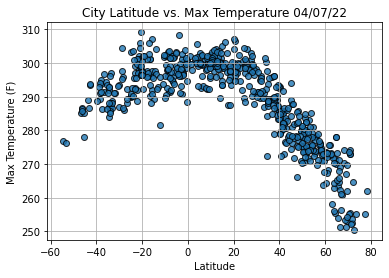

In [6]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("C:\\Users\\Blaine\\Documents\\College\\Bootcamp\\World_Weather_Analysis\\Resources\\Fig1.png")

# Show plot.
plt.show()

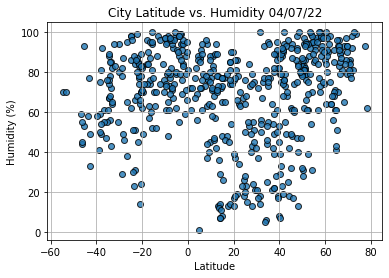

In [7]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("C:\\Users\\Blaine\\Documents\\College\\Bootcamp\\World_Weather_Analysis\\Resources\\Fig2.png")
# Show plot.
plt.show()

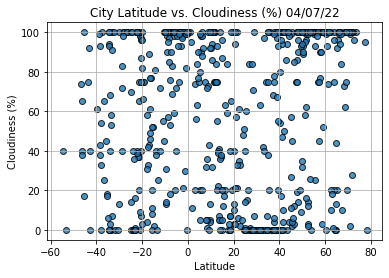

In [8]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("C:\\Users\\Blaine\\Documents\\College\\Bootcamp\\World_Weather_Analysis\\Resources\\Fig3.png")
# Show plot.
plt.show()

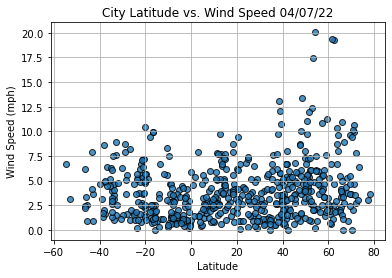

In [9]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("C:\\Users\\Blaine\\Documents\\College\\Bootcamp\\World_Weather_Analysis\\Resources\\Fig4.png")
# Show plot.
plt.show()

In [10]:
# Import linear regression from the SciPy stats module.
#from scipy.stats import linregress

In [11]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [12]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [13]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

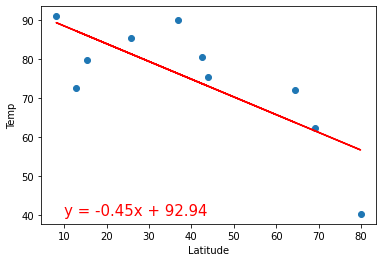

In [14]:
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [15]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,2,Diapaga,BF,2022-04-07 02:55:33,12.0708,1.7889,304.20,42,84,2.63
4,4,Hamilton,US,2022-04-07 02:44:39,39.1834,-84.5333,283.50,89,0,1.54
5,5,Najran,SA,2022-04-07 02:55:34,17.4924,44.1277,287.51,13,0,1.37
6,6,Pevek,RU,2022-04-07 02:55:35,69.7008,170.3133,253.00,90,100,3.66
7,7,Baoro,CF,2022-04-07 02:55:35,5.6667,15.9667,292.53,91,90,1.21
...,...,...,...,...,...,...,...,...,...,...
564,564,Jacqueville,CI,2022-04-07 03:12:06,5.2052,-4.4146,299.91,85,99,2.12
565,565,Provost,CA,2022-04-07 03:12:06,52.3501,-110.2683,273.96,75,2,2.93
566,566,Aberdeen,GB,2022-04-07 03:09:50,57.1437,-2.0981,276.78,100,75,2.57
567,567,Pecos,US,2022-04-07 03:12:08,31.4229,-103.4932,291.10,14,0,2.57


In [17]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,2,Diapaga,BF,2022-04-07 02:55:33,12.0708,1.7889,304.20,42,84,2.63
4,4,Hamilton,US,2022-04-07 02:44:39,39.1834,-84.5333,283.50,89,0,1.54
5,5,Najran,SA,2022-04-07 02:55:34,17.4924,44.1277,287.51,13,0,1.37
6,6,Pevek,RU,2022-04-07 02:55:35,69.7008,170.3133,253.00,90,100,3.66
7,7,Baoro,CF,2022-04-07 02:55:35,5.6667,15.9667,292.53,91,90,1.21


In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

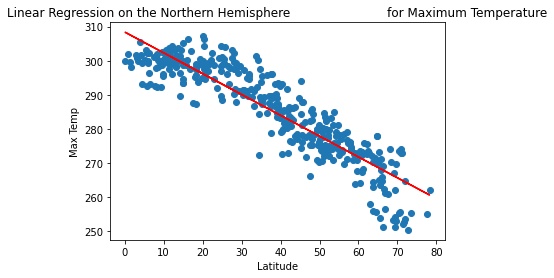

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

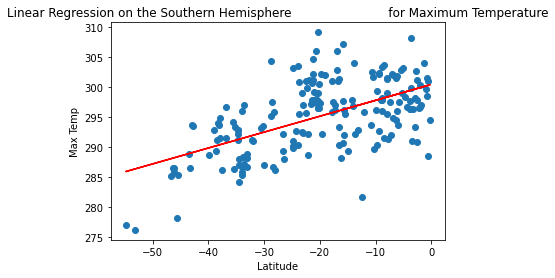

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

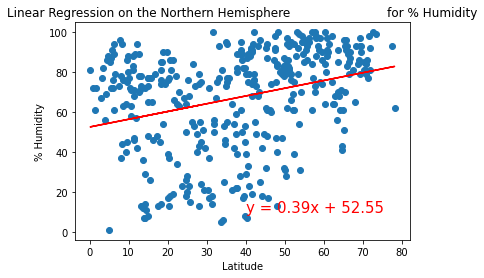

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

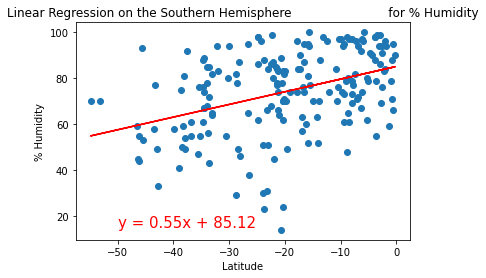

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

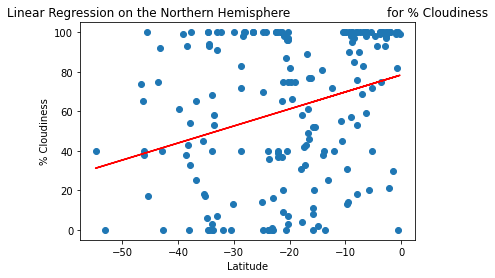

In [23]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

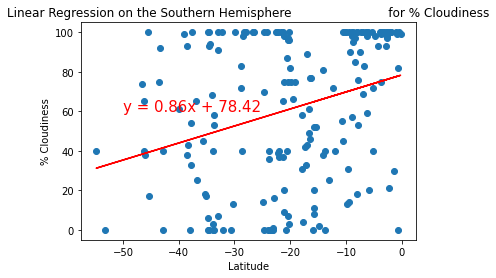

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

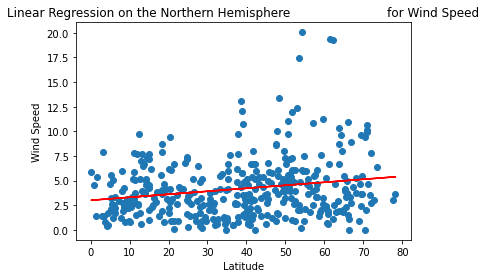

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

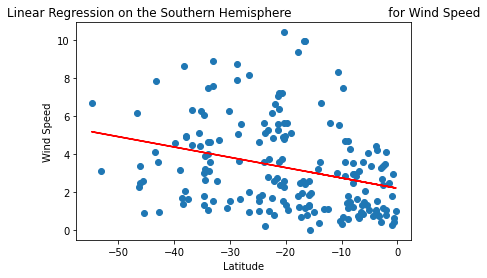

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [27]:
#pip install gmaps

In [28]:
import gmaps
# Import the API key.
from config import g_key

In [29]:
# Store the CSV you saved created in part one into a DataFrame.
#city_data_df = pd.read_csv("C:\\Users\\Blaine\\Documents\\College\\Bootcamp\\World_Weather_Analysis\\Resources\\cities.csv")
#city_data_df.head()

In [30]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [31]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

Usual method to build heat map is commented out below.

In [32]:
    # 1. Assign the locations to an array of latitude and longitude pairs.
#locations = [latitude, longitude]
    # 2. Assign the weights variable to some values.
#temperatures = # an array of length equal to the locations array length
    # 3. Assign the figure variable to the gmaps.figure() attribute.
#fig = gmaps.figure()
    # 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
#heatmap_layer = gmaps.heatmap_layer(locations, weights=temperatures)

    # 5. Add the heatmap layer.
#fig.add_layer(heatmap_layer)
    # 6. Call the figure to plot the data.

In [44]:
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [36]:
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)

In [37]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [41]:
#fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))